# Live Twitter Sentiment Analysis

## Introduction
The identification of sentiment in text is an important
field of study, with social media platforms
such as Twitter garnering the interest of researchers
in natural language processing as well as in political
and social sciences. The task usually involves
detecting whether a piece of text expresses
a POSITIVE, a NEGATIVE, or a NEUTRAL sentiment; Sentiment can be general or about a specific
topic, e.g., a person, a product, or an event. The goal of this project is to build a sentiment analysis model with given training dataset, so it can be applied to tweets gathered through twitter API.
Once the model is built, streamming tweets of certain topics will be gathered, and sentimenet analysis will be performed on gathered data to analyse peolple's polarity towards them.

## Motivation
Among all algorithm we chose for this project, the model to classify the tweets as neutral, positive and negative which is most common, It generated a test score of 49.41% using the algorithm mentioned in LinearSVC (SVM).  To improve the performance of evaluator, we tested many other algorithm such as Logistic Regression and Naïve bayes . And we test different n-gram methods, trigram has the best performance. This would be an advantage to build a  model with higher classification accuracy. So in this project, our motivation would be providing correct sentiment analysis for twitter to get their labels use deep learning algorithm for an effective classification based on twitter condition and labels and improve the current twitter analysis model by increasing the accuracy.

## Data
The main dataset we were using is borrowed from the SemEval-2017 Task 4. All the data files under the directory  "project/Subtask_A/downloaded" are used as our training set. And the data read from "SemEval2017-task4-test.subtask-A.english.txt" under the directory "project/Subtask_A/test" is our testing set.
<br> In the beginning we tried to use the Stanford Sentiment140 dataset, but the problem is there is not neutral tweets in that dataset, so we gave it up.
<br> We used the Google GloVe pre-trained word vector downloaded from https://nlp.stanford.edu/projects/glove/.
<br> We applied our sentiment analysis system gathering from the real-time tweets using Twitter.API.

In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
path ='Subtask_A/downloaded/'
all_files = glob.glob(path + "/twitter*.tsv")
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, sep='\t', header=None, names=['id','sentiment','text','to_delete'])
    list_.append(df.iloc[:,:-1])
df = pd.concat(list_)

In [5]:
df.head(10)

,id,sentiment,text
0,638060586258038784,neutral,05 Beat it - Michael Jackson - Thriller (25th ...
1,638061181823922176,positive,Jay Z joins Instagram with nostalgic tribute t...
2,638083821364244480,neutral,Michael Jackson: Bad 25th Anniversary Edition ...
3,638091450132078593,positive,I liked a @YouTube video http://t.co/AaR3pjp2P...
4,638125563790557184,positive,18th anniv of Princess Diana's death. I still ...
5,638130776727535617,positive,@oridaganjazz The 1st time I heard Michael Jac...
6,638134980862828544,neutral,'Michael Jackson' appeared on Saturday 29 at t...
7,638156605448695808,positive,Are you old enough to remember Michael Jackson...
8,638162155250954241,negative,@etbowser do u enjoy his 2nd rate Michael Jack...
9,638163324752891908,neutral,The Weeknd is the closest thing we may get to ...


In [6]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49467 entries, 0 to 49466
Data columns (total 3 columns):
id           49467 non-null int64
sentiment    49467 non-null object
text         49467 non-null object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [8]:
df.sentiment.value_counts()

neutral     22182
positive    19572
negative     7713
Name: sentiment, dtype: int64

Text(0.5,1,'SubtaskA Dataset')

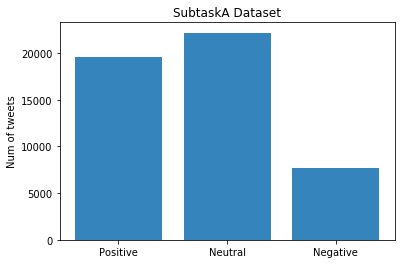

In [9]:
objects = ('Positive', 'Neutral', 'Negative')
pos = df.sentiment.value_counts().positive
neg = df.sentiment.value_counts().negative
neu = df.sentiment.value_counts().neutral
performance = [pos,neu,neg]
y_pos = np.arange(len(objects))
plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Num of tweets')
plt.title('SubtaskA Dataset')

In [10]:
df['sentiment'] = df['sentiment'].map({'neutral': 1, 'positive': 2, 'negative': 0})

## Code
### External code
In this project, we referred Porter Stemmer and WordNet form the NLTK library to do the map- ping. The Porter Stemmer algorithm is a pro- cess for removing the commoner morphologi- cal and inflexional ending from words in En- glish. Its source code can be retrieved from NLTK homepage.
WordNet is a large lexical database for the English language, which was created by Prince- ton. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms. The source code can be downloaded from WordNet homepage. We also use pytorch to implement and modify our deep learning model for convinence.
### Reused code
We reused the n-gram algorithms code from our homework2, which help us to calculate the n-gram accuracy and recall. Then, part of code from homework3 also be reused for chunking. In this project, many algorithms are modified and combined by previous algorithms, and they are wrapped in the python file and imported as helper function.

## Approach A: Lexical approach

### 1. Textblob
One baseline model we wanted to compare with is TextBlob. Textblob is a python library for processing textual data. Apart from other useful tools such as POS tagging, n-gram, The package has built-in sentiment classification named "polarity". We noticed that this method is used widely for streamming twitter analysis on the internet. This is a so-called out-of-the-box sentiment analysis tool, we will compare the performance of Textblob and our models to get the evaluation.

In [11]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [12]:
def polarity_to_sentiment(x):
    if x == 0:
        return 1
    elif x > 0 and x <= 1:
        return 2
    else:
        return 0

#### Textblob on training set

In [13]:
pred_raw = [polarity_to_sentiment(TextBlob(i).sentiment.polarity) for i in df.text]
accuracy_score(df.sentiment, pred_raw)

0.5062971273778478

We can see Textblob does not perform well on raw data, the prediction accuracy is kind of low (about 50%). So if people use Textblob to do twitter sentiment analysis, they probably would not get the result that they want, at least for our dataset. 

### 2. Naive bayes Model
Naive-Bayes classifiers are probabilistic classifier which come under machine learning techniques. These classifier are based on applying Bayes' theorem with strong(naive) assumption of independence between each pair of features. [2]

#### Multinomial naive Bayes
MultinominalNB expands the use of NB algorithm. It implements NB for data distributed multinomially, and also uses one of its version for text classification (in which word counts are used to represents data, and also tf-idf works extremely well in regular practice). we parameterized the distribution data by vectors for every y, where 'n' gives the total feature(which means, the size of vocabulary for next classification) and probability of each i that appears in the sample of class ‟y‟ is 𝜃𝑦𝑖 then use smoothed version of maximum likelihood for estimation of parameters𝜃𝑦1 which is relative frequency of counting.
$${\displaystyle p(\mathbf {x} \mid C_{k})={\frac {(\sum _{i}x_{i})!}{\prod _{i}x_{i}!}}\prod _{i}{p_{ki}}^{x_{i}}}$$

#### Bernoulli naive Bayes
BernoulliNB implements NB algorithm for training and classification. It use NB for multivariate Bernoulli distribution of data i.e., there can be many features but each and every one is assumed to have a binary value or Boolean (true or false ) variable. Hence, every class requires samples which have to be represented in binary value variables; also if any other kind of data is given then BernoulliNB can Binaries its input. which is different from MultinomialNB's rule, this rule directly punish any unavailability of feature i which behave like a feature of class y where as in multinomial it simply ignore if there is any non-occurring feature. The BernoulliNB decision rule is explained as: 
$${\displaystyle p(\mathbf {x} \mid C_{k}) = \prod _{i=1}^{n}p_{ki}^{x_{i}}(1-p_{ki})^{(1-x_{i})}}$$

### 3. Logistic regression
Logistic regression model is also a linear model for classification. this model is also known by other names as Maximum-Entropy (MaxEnt)classification or log-linear. A logistic function is used in this model, where probability describe the outcome of single trial. The logistic regression can be implemented from Scikit-learn library of Python in which there is a class named Logistic Regression. This implementation fits a OvR (one-vs-rest) multiclass regression with an optional L1 or L2 regulation. L2penalized logistic regression helps in minimizing the following cost function.

$${\displaystyle l=\beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2},}$$

$${\displaystyle o=b^{\beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2}}}$$

$${\displaystyle p={\frac {b^{\beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2}}}{b^{\beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2}}+1}}={\frac {1}{1+b^{-(\beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2})}}}}$$

### 4. Linear SVC
SVM are supervised machine learning methods used for classification, regression and detection models.SVM is more effective foe high dimensional space. SVCs are capable for multi-class classification. SVCand NuSVC is similar whereas, LinearSVC are based on linear kernels. All these SVCs take two input array X of size [samples, feature] and array Y of size[samples]. NuSvc implements 'one-against-once' scheme
for multi-class, hence it provides consistent interface with other classifier. Whereas, LinearSVC implements' one-vs-rest' scheme.

$${\displaystyle \left[{\frac {1}{n}}\sum _{i=1}^{n}\max \left(0,1-y_{i}(w\cdot x_{i}-b)\right)\right]+\lambda \lVert w\rVert ^{2}.\qquad}$$

## Experimental Setup

### Pre-processing

In [14]:
import codecs
import unidecode
import re
from cleaner import spacy_cleaner as clean

In [15]:
pd.set_option('display.max_colwidth', -1)

### Step1: Remove URL

In [16]:
df.text[3]

'I liked a @YouTube video http://t.co/AaR3pjp2PI One Direction singing "Man in the Mirror" by Michael Jackson in Atlanta, GA [June 26,'

In [17]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[3])

'I liked a @YouTube video  One Direction singing "Man in the Mirror" by Michael Jackson in Atlanta, GA [June 26,'

### Step2: Remove username mentions (@)

In [18]:
df.text[8]

"@etbowser do u enjoy his 2nd rate Michael Jackson bit? Honest ques. Like the can't feel face song but god it's so obvious they want MJ 2.0"

In [19]:
re.sub(r'@[A-Za-z0-9]+','',df.text[8])

" do u enjoy his 2nd rate Michael Jackson bit? Honest ques. Like the can't feel face song but god it's so obvious they want MJ 2.0"

### Step3: Remove hashtags (#)

In [20]:
df.text[25]

"The Weeknd may be Michael Jackson reincarnated... I'm just saying there are a lot of similarities musically #butthatsnoneofmybusiness"

In [21]:
re.sub("[^a-zA-Z]", " ", df.text[25])

'The Weeknd may be Michael Jackson reincarnated    I m just saying there are a lot of similarities musically  butthatsnoneofmybusiness'

### Step4: Contraction handling

In [22]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" }

### Step5: Tokenization
<br>Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded.

### Step6: Stemming/lemmatizing
<br>Lemmatized each token using Spacy method '.lemma_'. Pronouns are kept as they are since Spacy lemmatizer transforms every pronoun to "-PRON-".
<br>Special character removal.
<br>Single syllable token removal.

### Cleaner function summary

In [23]:
def spacy_cleaner(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
    apostrophe_handled = re.sub("’", "'", decoded)
    expanded = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
    parsed = nlp(expanded)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_num or t.like_url or str(t).startswith('@'):
            pass
        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined = ' '.join(final_tokens)
    spell_corrected = re.sub(r'(.)\1+', r'\1\1', joined)
    return spell_corrected

### Cleaned data

In [24]:
data = pd.read_csv('data/cleaned_data.csv', header=None, names = ['sentiment', 'cleaned_text'])
data.head(10)

,sentiment,cleaned_text
0,1,beat it michael jackson thriller th anniversary edition hd
1,1,michael jackson bad th anniversary edition picture vinyl this unique picture disc vinyl include the original
2,1,michael jackson appear on saturday at the th place in the top of miami trends trndnl
3,1,the weeknd be the close thing we may get to michael jackson for long time especially since he damn near mimic everything
4,1,all of you people who be say the weekend be the next michael jackson go to sleep you get school tomorrow
5,1,I just may be actually do with this award show unless they get michael jackson on hologram
6,1,you may say oh it be august liam from one direction birthday but no it be also michael jackson birthday
7,1,np michael jackson human nature on brunchintheciti tunein th of track from the thriller album
8,1,you get that from his website My brother mate at school once say his nd cousin be michael jackson similar tale to this
9,1,I actually believe that his nd cousin be michael jackson gutted when I find out he be not I be by then


### 7. Data visualization

#### Word cloud

In [23]:
neg_tweets = data[data.sentiment == 0]
neg_string = []
for t in neg_tweets.cleaned_text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

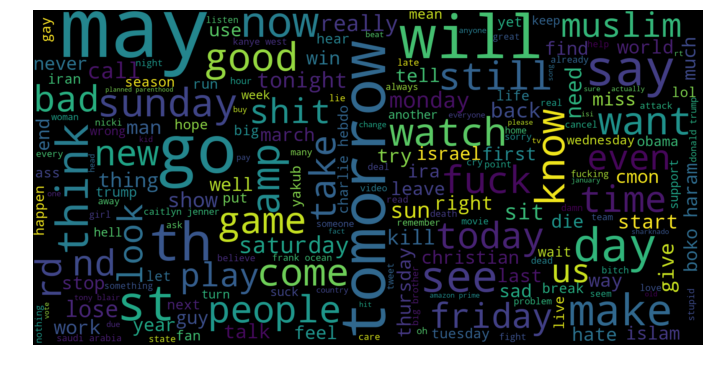

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
for t in neg_tweets.cleaned_text[:500]:
    if 'good' in t:
        print(t)

the good way to find malaysia airlines flight mh may be with michelle obama arm
the conveyor belt of good buy at monsanto supermarket or shall we say the assembly line of puppet mon bathe
monsanto roundup not good for you monsanto
It be saturday night in vegas I be stick with no clothe wonder if I can go out and have good time in my nike gym outfit
be part of it still cry still say goodbye ric flair may you live forever way too much loss lately
thank for hat america scotus I hope you all get cancer ok good talk cc
billy the kid billy get Your gun via good get it before scotus redefine the nd amend
My dad may listen to snoop dogg and cent now but thank god he raise me on good music before this mid life music crisis
talk about post holiday blues second of george osborne voice undo all the good of week in the sun personification of wet monday
so watchman be an early draft of mockingbird people have be have in get excited for this cmon public you be good than this


In [26]:
pos_tweets = data[data.sentiment == 2]
pos_string = []
for t in pos_tweets.cleaned_text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

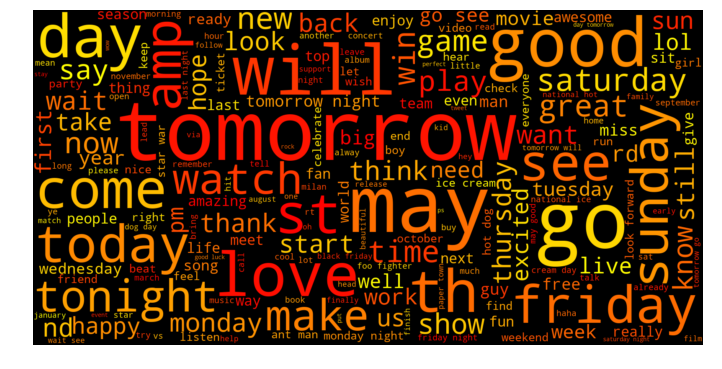

In [27]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='autumn').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 8. Investigate the Tokens

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english')
cvec.fit(data.cleaned_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [29]:
len(cvec.get_feature_names())

38914

The count vectorizer has extracted 38914 words out of the corpus.

In [30]:
neg_matrix = cvec.transform(data[data.sentiment == 0].cleaned_text)
pos_matrix = cvec.transform(data[data.sentiment == 2].cleaned_text)
neut_matrix = cvec.transform(data[data.sentiment == 1].cleaned_text)

neg_tf = np.sum(neg_matrix,axis=0)
pos_tf = np.sum(pos_matrix,axis=0)
neut_tf = np.sum(neut_matrix,axis=0)

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
neut = np.squeeze(np.asarray(neut_tf))

In [31]:
term_freq_df = pd.DataFrame([neg, pos, neut],columns=cvec.get_feature_names()).transpose()

In [32]:
term_freq_df = term_freq_df.rename(index=str, columns={0: "neg", 1: "pos", 2: "neut"})

In [33]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

Top10 tokens in our training set

In [34]:
term_freq_df['total'] = term_freq_df['neg'] + term_freq_df['pos'] + term_freq_df['neut']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,neg,pos,neut,total
tomorrow,1021,3854,3180,8055
th,781,2491,3049,6321
day,549,2517,1612,4678
just,846,1684,1767,4297
st,595,1297,1513,3405
night,319,1625,1395,3339
good,284,2427,557,3268
friday,322,1414,1298,3034
sunday,367,1236,1326,2929
like,660,1092,1120,2872


Text(0.5,1,'Top 50 tokens in negative tweets')

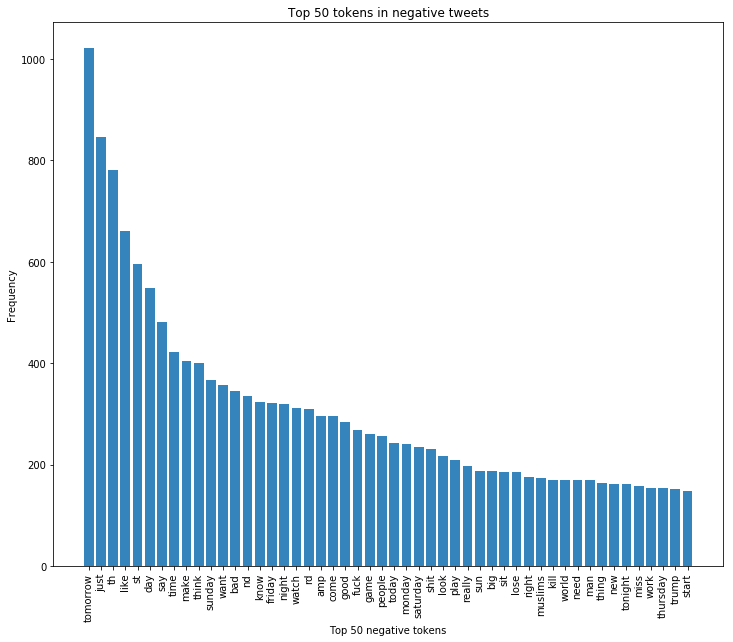

In [35]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='neg', ascending=False)['neg'][:50], align='center', alpha=0.9)
plt.xticks(y_pos, term_freq_df.sort_values(by='neg', ascending=False)['neg'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5,1,'Top 50 tokens in positive tweets')

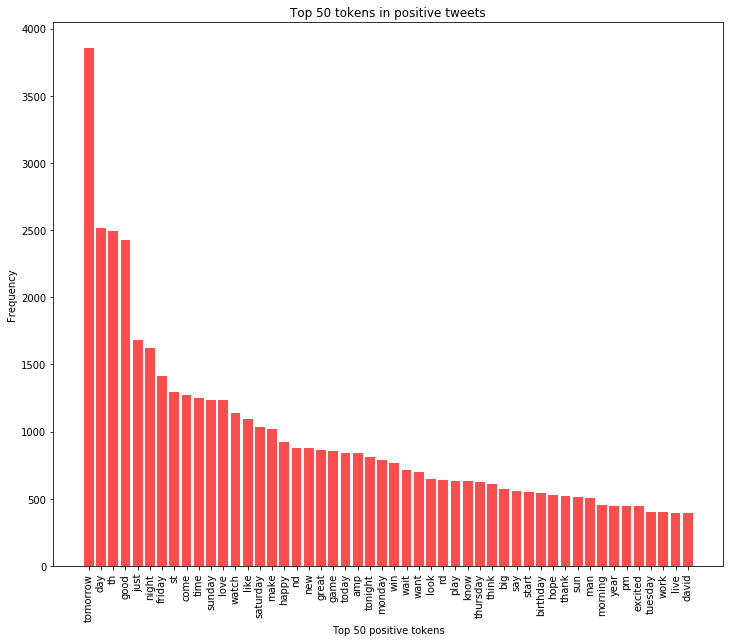

In [36]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='pos', ascending=False)['pos'][:50], align='center', alpha = 0.7, color='r')
plt.xticks(y_pos, term_freq_df.sort_values(by='pos', ascending=False)['pos'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5,1,'Top 50 tokens in neutrual tweets')

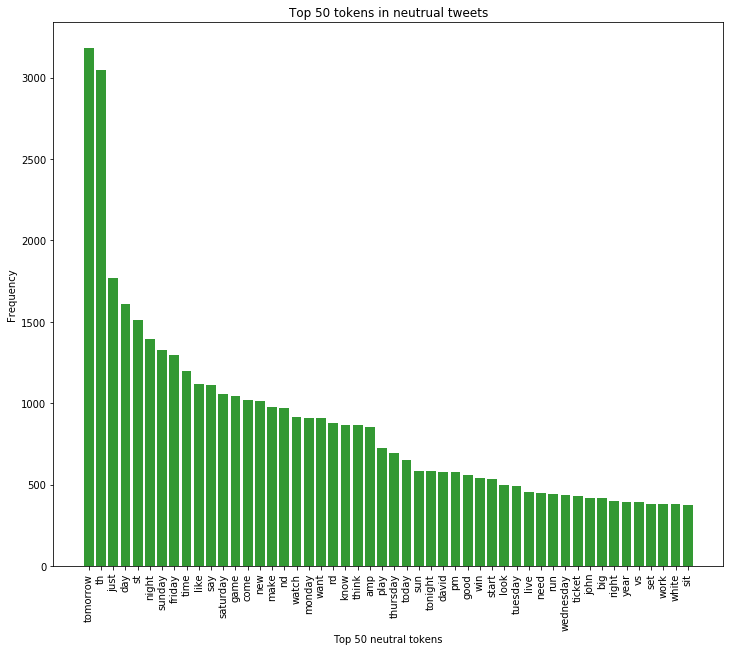

In [37]:
y_neut = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_neut, term_freq_df.sort_values(by='neut', ascending=False)['neut'][:50], align='center', alpha = 0.8, color='g')
plt.xticks(y_neut, term_freq_df.sort_values(by='neut', ascending=False)['neut'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 neutral tokens')
plt.title('Top 50 tokens in neutrual tweets')

### 9. Feature extraction with TF-IDF Vectorizer

TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

Relative term frequency is calculated for each term within each document as below.

$${TF(t,d)} = \frac {number\ of\ times\ term(t)\ appears\ in\ document(d)}{total\ number\ of\ terms\ in\ document(d)}$$

Next, we need to get Inverse Document Frequency, which measures how important a word is to differentiate each document by following the calculation as below.

$${IDF(t,D)} = \log \Big(\frac {total\ number\ of\ documents(D)}{number\ of\ documents\ with\ the\ term(t)\ in\ it}\Big)$$

Once we have the values for TF and IDF, now we can calculate TFIDF as below.

$${TF-IDF(t,d,D)} = {TF(t,d)}\cdot{IDF(t,D)}$$

### 10. Performance parameter for evaluation

#### 1. Accuracy
One kind of measure of performance can be accuracy. It is the number of times the model predicted correctly for the class over the number of the whole data set. But in case of classification, this can be broken down further. Below is a representation of confusion matrix.

$${Accuracy} = \frac {True Positive + True Negative}{Positive + Negative} = \frac {True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

#### 2. Recall
"Recall" tells you what proportion of data that actually is positive were predicted positive. In other words, the proportion of True Positive in the set of all actual positive data.

$${Recall} = \frac {True Positive}{Positive} = \frac {True Positive}{True Positive + False Negative}$$

#### 3. F1 score
"F1 score" is the harmonic mean of precision and recall. The harmonic mean is a specific type of average, which is used when dealing with averages of units, like rates and ratios. So by calculating the harmonic mean of the two metrics, it will give you a good idea of how the model is performing both in terms of precision and recall. The formula is as below

$${F1} = 2\cdot\frac {Precision\cdot Recall}{Precision + Recall}$$

### Raw testing data

In [25]:
test_data = pd.read_csv('test-data.txt',index_col=None, sep='\t', header=None, names=['id','sentiment','text'])
test_data.head(10)

,id,sentiment,text
0,801989080477154944,neutral,#ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA
1,801989272341453952,positive,Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande
2,801990978424962944,positive,Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande
3,801996232553963008,positive,#CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK
4,801998343442407040,neutral,SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈 #LOTB… https://t.co/tEd8rftAxV
5,802001659970744064,positive,Hairspray Live! Previews at the Macy's Thanksgiving Day Parade! https://t.co/GaFTqInolL #arianagrande #televisionnbc
6,802003380973568000,positive,#LindsayLohan Is ‘Feeling Thankful’ After Blasting #ArianaGrande For Wearing ‘#TooMuch… https://t.co/Acf8ogvPxd https://t.co/EOSHtG9ay4
7,802014830467174016,neutral,I hate her but... I love her songs Dammit ._.#ArianaGrande
8,802020578609623040,neutral,Ariana Grande 【Right There ft. Big Sean】#アリアナ #arianagrande https://t.co/4rZOKYDnut
9,802021059490934016,positive,which one would you prefer to listen to for a whole day? 😍🤘🏼; i could never choose #arianagrande #IntoYou #SideToSide #songs #Poll


### Cleaned testing data

In [152]:
test = pd.read_csv('clean_test.csv')
test.head(10)

,sentiment,clean_text
0,1,arianagrande ari by ariana grande full singer actress
1,2,ariana grande kiis fm yours truly cd listen party in burbank arianagrande
2,2,ariana grande white house easter egg roll in washington arianagrande
3,2,cd music ariana grande sweet like candy oz ml seal in box authenic new ofmpbovzya
4,1,side to side sidetoside arianagrande musically comunidadgay lgbtd lotba
5,2,hairspray live preview at the macy thanksgiving day parade arianagrande televisionnbc
6,2,lindsaylohan be afeel thankfula after blast arianagrande for wear atoomucha
7,1,I hate her but I love her song dammit arianagrande
8,1,ariana grande aright there ft big seanaac aac arianagrande
9,2,which would you prefer to listen to for whole day dd could never choose arianagrande intoyou sidetoside song poll


### 11. Test with N-gram features using logistic regression

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec1 = TfidfVectorizer(stop_words=None, ngram_range=(1,1)) # unigram
tvec2 = TfidfVectorizer(stop_words=None, ngram_range=(1,2)) # bigram
tvec3 = TfidfVectorizer(stop_words=None, ngram_range=(1,3)) # trigram

In [222]:
from sklearn.linear_model import LogisticRegression

#### Unigram

In [42]:
lr1 = LogisticRegression()
X1 = tvec1.fit_transform(data.cleaned_text)
X_train1 = X1
y_train = data.sentiment
lr1.fit(X_train1, y_train)
len(tvec1.get_feature_names())

39201

In [43]:
lr1_pred = lr1.predict(tvec1.transform(test['clean_text']))
lr1_acc = accuracy_score(test['sentiment'], lr1_pred)
lr1_recall = recall_score(test['sentiment'], lr1_pred, average='macro') 
lr1_f1 = f1_score(test['sentiment'], lr1_pred, average='macro') 
print('accuracy:',lr1_acc)
print('recall',lr1_recall)
print('f1_score',lr1_f1)

accuracy: 0.5904585923064002
recall 0.5577771229143864
f1_score 0.5576582972492657


#### Bigram

In [44]:
lr2 = LogisticRegression()
X2 = tvec2.fit_transform(data.cleaned_text)
X_train2 = X2
y_train = data.sentiment
lr2.fit(X_train2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
lr2_pred = lr2.predict(tvec2.transform(test['clean_text']))
lr2_acc = accuracy_score(test['sentiment'], lr2_pred)
lr2_recall = recall_score(test['sentiment'], lr2_pred, average='macro') 
lr2_f1 = f1_score(test['sentiment'], lr2_pred, average='macro') 
print('accuracy:', lr2_acc)
print('recall', lr2_recall)
print('f1_score',lr2_f1)

accuracy: 0.5893667058625903
recall 0.5628942641771744
f1_score 0.557203702621306


#### Trigram

In [46]:
lr3 = LogisticRegression()
X3 = tvec3.fit_transform(data.cleaned_text)
X_train3 = X3
y_train = data.sentiment
lr3.fit(X_train3, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
lr3_pred = lr3.predict(tvec3.transform(test['clean_text']))
lr3_acc = accuracy_score(test['sentiment'], lr3_pred)
lr3_recall = recall_score(test['sentiment'], lr3_pred, average='macro') 
lr3_f1 = f1_score(test['sentiment'], lr3_pred, average='macro') 
print('accuracy',lr3_acc)
print('recall',lr3_recall)
print('f1_score',lr3_f1)

accuracy 0.5828153871997312
recall 0.5648866858853726
f1_score 0.5555076893253525


Surprisingly, the combination of logistic regression and unigram features stands out.

### 12. With and without Stopwords

In [48]:
tvec4 = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
lr4 = LogisticRegression()
X4 = tvec4.fit_transform(data.cleaned_text)
X_train4 = X4
y_train = data.sentiment
lr4.fit(X_train4, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
lr4_pred = lr4.predict(tvec4.transform(test['clean_text']))
lr4_acc = accuracy_score(test['sentiment'], lr4_pred)
lr4_recall = recall_score(test['sentiment'], lr4_pred, average='macro') 
lr4_f1 = f1_score(test['sentiment'], lr4_pred, average='macro') 
print('accuracy',lr4_acc)
print('recall',lr4_recall)
print('f1_score',lr4_f1)

accuracy 0.5849991600873509
recall 0.5441881727639243
f1_score 0.5439392682828137


### 12. Baseline algorithms comparison

The best result I can get with logistic regression was by using TFIDF vectorizer without stopwords and including only unigram. With this I will first fit various different models and compare their validation results, then I will dump the top 3 models for later use.

In [50]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB

In [51]:
tvec = TfidfVectorizer(stop_words=None, ngram_range=(1,1))

lr = LogisticRegression()
nb = BernoulliNB()
svc = LinearSVC()

In [52]:
X = tvec.fit_transform(data.cleaned_text)
len(tvec.get_feature_names())

39201

In [53]:
X_train = X
y_train = data.sentiment

lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [54]:
import pickle
tvec.fit_transform(data.cleaned_text)
pickle.dump(lr, open('lr.sav', 'wb'))
pickle.dump(nb, open('nb.sav', 'wb'))
pickle.dump(svc, open('svc.sav', 'wb'))
pickle.dump(tvec, open('trans.sav', 'wb'))

In [55]:
loaded_transformer = pickle.load(open('trans.sav', 'rb'))
loaded_lr = pickle.load(open('lr.sav', 'rb'))
loaded_nb = pickle.load(open('nb.sav', 'rb'))
loaded_svc = pickle.load(open('svc.sav', 'rb'))

In [56]:
lr_pred = loaded_lr.predict(loaded_transformer.transform(test['clean_text']))
lr_acc = accuracy_score(test['sentiment'], lr_pred)
lr_recall = recall_score(test['sentiment'], lr_pred, average='macro') 
lr_f1 = f1_score(test['sentiment'], lr_pred, average='macro') 
print('accuracy:',lr_acc)
print('recall:',lr_recall)
print('f1_score:',lr_f1)

accuracy: 0.5904585923064002
recall: 0.5577771229143864
f1_score: 0.5576582972492657


In [57]:
nb_pred = loaded_nb.predict(loaded_transformer.transform(test['clean_text']))
nb_acc = accuracy_score(test['sentiment'], nb_pred)
nb_recall = recall_score(test['sentiment'], nb_pred, average='macro') 
nb_f1 = f1_score(test['sentiment'], nb_pred, average='macro') 
print('accuracy:',nb_acc)
print('recall:', nb_recall)
print('f1_score:',nb_f1)

accuracy: 0.5841592474382664
recall: 0.5543657696522953
f1_score: 0.550968599011935


In [58]:
svc_pred = loaded_svc.predict(loaded_transformer.transform(test['clean_text']))
svc_acc = accuracy_score(test['sentiment'], svc_pred)
svc_recall = recall_score(test['sentiment'], svc_pred, average='macro') 
svc_f1 = f1_score(test['sentiment'], svc_pred, average='macro') 
print('accuracy:',svc_acc)
print('recall:',svc_recall)
print('f1_score:',svc_f1)

accuracy: 0.5741642869141609
recall: 0.5678474160407059
f1_score: 0.5613474865544598


### 13. Emoticons and Emoji detection

#### Emoticons
There are two fundamental data mining tasks that can be considered in con- junction with Twitter data: text analysis and symbol analysis. Due to the nature of this microblogging service (quick and short messages), people use acronyms, make spelling mistakes, use emoticons and other characters that express special meanings. Emoticons are metacommunicative pictorial representation of a facial expression pictorially represented using punctuation and letters or pictures; they express the user’s mood.
The use of emoticons can be tracked back to the 19th century. The first docu- mented person to have used the emoticons :-) and :-( on the Internet was Scott Fahlman from Carnegie Mellon University in a message dated 19 September 1982.[4]
Some emoticons as a characters are included in the Unicode standard – three in the Miscellaneous Symbols block, and over sixty in the Emoticons block.
Emoticons can be categorized as:
<br>Happy emoticons : :-) :) :D :o) :] :3 :c) :> =] 8), etc.
<br>Sad emoticons: >:[ :-( :( :-c :c :-< :っC :< :-[ :[ :{, etc.
<br>Neutral emoticons: >:\ >:/ :-/ :-. :/ :\ =/ =\ :L =L :S >.<, etc.

#### Emoji
Emoji were originally used in Japanese electronic messages and spreading outside of Japan. The characters are used much like emoticons, although a wider range is provided. The rise of popularity of emoji is due to its being incorporated into sets of characters available in mobile phones. Apple in IOS, Android and other mobile operating systems included some emoji character sets. Emoji char- acters are also included in the Unicode standard. Emoji can be categorized into same categories as emoticons. Emoji can be even translated to English using http://emojitranslate.com/.

#### The emoticons and emojis are collectet in two seperated txt files called 'emoticons.txt' and 'emoji.txt' for the detection use.

In [59]:
test_data['text'].head(10)

0    #ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA                             
1    Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande                                    
2    Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande                                            
3    #CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK
4    SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈  #LOTB… https://t.co/tEd8rftAxV                   
5    Hairspray Live! Previews at the Macy's Thanksgiving Day Parade! https://t.co/GaFTqInolL #arianagrande #televisionnbc                     
6    #LindsayLohan Is ‘Feeling Thankful’ After Blasting #ArianaGrande For Wearing ‘#TooMuch… https://t.co/Acf8ogvPxd https://t.co/EOSHtG9ay4  

In [60]:
import emo_detect as emo
def cleanTweet(twitter):
    # Remove URL, Links, Special Characters etc from tweet
    twitter = re.sub(r"http\S+", "", twitter)
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", twitter).split())

In [61]:
emoji_pos, emoji_neg = emo.get_emoji()
emoticons_pos, emoticons_neg = emo.get_emoticon()

In [62]:
def detector(model, tvec, tweet):
    emoji_sentiment = emo.emoji_detect(tweet, emoji_pos, emoji_neg)
    if emoji_sentiment != 100:
#         print("-------THIS IS A EMOJI SENTIMENT!-------")
        return emoji_sentiment
    else:
        clean_tweet = cleanTweet(tweet)
        emoticon_sentiment = emo.emoticon_detect(clean_tweet, emoticons_pos, emoticons_neg)
        if emoticon_sentiment != 100:
#             print("======THIS IS A EMOTICON SENTIMENT!======")
            return emoticon_sentiment
        else:
            text = clean(tweet)
            sentiment_value = model.predict(loaded_transformer.transform([text]))[0]
            return sentiment_value

#### Classifer + Emo Detection
The code below could run about 10 to 15 minutes. And the reults showed that Emo detection does improve the performance of our models by 0.2% to 0.4%.

In [63]:
lr_and_emo = []
for i in range(0, 11906):
    lr_and_emo.append(detector(loaded_lr, loaded_transformer, test_data['text'][i]))

In [64]:
nb_and_emo = []
for i in range(0, 11906):
    nb_and_emo.append(detector(loaded_nb, loaded_transformer, test_data['text'][i]))

In [65]:
svc_and_emo = []
for i in range(0, 11906):
    svc_and_emo.append(detector(loaded_svc, loaded_transformer, test_data['text'][i]))

In [66]:
lr_acc = accuracy_score(test['sentiment'], lr_and_emo)
lr_recall = recall_score(test['sentiment'], lr_and_emo, average='macro') 
lr_f1 = f1_score(test['sentiment'], lr_and_emo, average='macro') 
print('accuracy:',lr_acc)
print('recall:',lr_recall)
print('f1_score:',lr_f1)

accuracy: 0.5910465311607593
recall: 0.5632364568746567
f1_score: 0.5610855508722961


In [67]:
nb_acc = accuracy_score(test['sentiment'], nb_and_emo)
nb_recall = recall_score(test['sentiment'], nb_and_emo, average='macro') 
nb_f1 = f1_score(test['sentiment'], nb_and_emo, average='macro') 
print(nb_acc)
print(nb_recall)
print(nb_f1)

0.584831177557534
0.5596164506576579
0.5544679944569508


In [68]:
svc_acc = accuracy_score(test['sentiment'], svc_and_emo)
svc_recall = recall_score(test['sentiment'], svc_and_emo, average='macro') 
svc_f1 = f1_score(test['sentiment'], svc_and_emo, average='macro') 
print('accuracy:',svc_acc)
print('recall:',svc_recall)
print('f1_score:',svc_f1)

accuracy: 0.5739123131194356
recall: 0.5719299988396173
f1_score: 0.5629068197670538


## Approach B: Deep Learning Approach
We implement two kinds of deep learning model to compare their performance on twitter sentiment analysis, CNN and RNN. Training process is very expensive as we do not have the access of a powerful GPU, we trained on at most 20 epochs and it took for hours.
### Using Google GloVe embedding
Using the knowledge from an external embedding can enhance the precision of your RNN because it integrates new information (lexical and semantic) about the words, an information that has been trained and distilled on a very large corpus of data.The pre-trained embedding we’ll be using is GloVe. GloVe is an unsupervised learning algorithm for obtaining vector representations for words.[3] Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

### Convolutional Neural Network (CNN) 
CNN is a class of deep, feed-forward artificial neural networks ( where connections between nodes do not form a cycle) & use a variation of multilayer perceptrons designed to require minimal preprocessing. These are inspired by animal visual cortex.[5]
CNNs are generally used in computer vision, however they’ve recently been applied to various NLP tasks and the results were promising
<br>Here is an example:

![title](cnn.png)

Image source: http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

1. Our network is trained by minimizing a negative likelihood over the training set D. Given a sentence x, the network with parameter set θ computes a score sθ(x)τ for each sentiment label τ ∈ T. In order to transform these scores into a conditional probability distribution of labels given the sentence and the set of network parameters θ, we apply a softmax operation over the scores of all tags τ ∈ T.
2. We use Adaptive Moment Estimation (Adam) to minimize the negative log-likelihood with respect to θ.
3. We use Cross Entropy to define loss function in machine learning.

### Softemax operation
the softmax function, softargmax, or normalized exponential function:198 is a generalization of the logistic function that "squashes" a K-dimensional vector ${\displaystyle \mathbf {z} } \mathbf {z}$  of arbitrary real values to a K-dimensional vector ${\displaystyle \sigma (\mathbf {z} )} \sigma (\mathbf {z} )$ of real values, for ${\displaystyle K\geq 2}$ ${\displaystyle K\geq 2}$, where each entry is in the interval (0, 1), and all the entries add up to 1.

${\displaystyle P(y=j\mid \mathbf {x} )={\frac {e^{\mathbf {x} ^{\mathsf {T}}\mathbf {w} _{j}}}{\sum _{k=1}^{K}e^{\mathbf {x} ^{\mathsf {T}}\mathbf {w} _{k}}}}}$

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import config
import numpy as np

from torch.autograd import Variable
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

In [70]:
class CNNClassifier(nn.Module):
    def __init__(self, nembedding, vocab_size, kernel_num, kernel_sizes, label_size,
                 dropout=0.3, use_pretrain=False, embed_matrix=None, embed_freeze=False):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, nembedding)
        if use_pretrain is True:
            self.embedding.weight = nn.Parameter(torch.from_numpy(embed_matrix).type(torch.FloatTensor),
                                                 requires_grad=not embed_freeze)
        self.in_channel = 1
        self.out_channel = kernel_num
        self.kernel_sizes = kernel_sizes
        self.kernel_num = kernel_num
        self.convs1 = nn.ModuleList([nn.Conv2d(self.in_channel, self.out_channel, (K, nembedding))
                                     for K in self.kernel_sizes])  # kernel_sizes,like (3,4,5)

        self.dropout = nn.Dropout(dropout)
        """
        in_feature=len(kernel_sizes)*kernel_num,because we concatenate 
        """
        self.fc = nn.Linear(len(kernel_sizes) * kernel_num, label_size)

    def forward(self, sequences):
        padded_sentences, lengths = pad_packed_sequence(sequences, padding_value=int(0),
                                                        batch_first=True)  # set batch_first true
        x = self.embedding(padded_sentences)  # batch_size*num_word*nembedding

        x = x.unsqueeze(1)  # (batch_size,1,num_word,nembedding)   1 is in_channel

        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1]  # a list containing (batch_size,out_channel,W)

        x = [F.max_pool1d(e, e.size(2)).squeeze(2) for e in
             x]  # max_pool1d(input, kernel_size),now x is a list of (batch_size,out_channel)

        x = torch.cat(x, dim=1)  # concatenate , x is batch_size,len(kernel_sizes)*kernel_num

        x = self.dropout(x)
        logits = self.fc(x)

        return logits

### Sentence Level Representing

Given a sentence s composed of M words {c1, c2, ..., cm}, first transfer each word ci into a characer embedding R^chr. Character embeddings are encoded by column vectors in the embedding matrix W^chr. Here we used the "Google's word2vec" pretrained word vector model. It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features. Given a character c, its embedding r^chr is obtained by matrix-vector product: R^chr = W^chr * v^c. (v^c: a vector of |V^chr| which has value 1 at index c and zero in all other positions) The input for the convolutional layer is the sequence of character embeddings {R1^chr, R2^chr, ..., Rm^chr}
Using convolutional layer to extract character-level features for each word, then apply a max-overtime pooling operation in order to capture the most important feature for each character-level feature.  
Our output has three label = [ pos, neg, neural ], we took the maximum as a sentiment for each sentence.

### Recurrent Neural Network (RNN) 
A recurrent neural network (RNN) is a class of artificial neural network where connections between nodes form a directed graph along a sequence. This allows it to exhibit dynamic temporal behavior for a time sequence.

<img src="rnn1.png" alt="drawing" width="500"/>

Same here, we convert each sentence into word embedded vector with pretrained weight from" Google's word2vec" as an input to RNN model. 
<br>$y = softmax(Uh^{(2)} + b^{(s)})$ 
<br>$h^{(2)} = Relu(W^{(2)}h^{(1)} + b^{(1)})$ 
<br>$h^{(1)} = Relu(W^{(1)}[hleft hright] + b^{(1)})$

In [71]:
class RNNClassifier(nn.Module):
    def __init__(self, nembedding, hidden_size, num_layer, dropout,
                 vocab_size, label_size, use_pretrain=False, embed_matrix=None, embed_freeze=True):
        super(RNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, nembedding)
        if use_pretrain is True:
            self.embedding.weight = nn.Parameter(torch.from_numpy(embed_matrix).type(torch.FloatTensor),
                                                 requires_grad=not embed_freeze)

        self.gru = nn.GRU(input_size=nembedding,
                          hidden_size=hidden_size,
                          num_layers=num_layer,
                          dropout=dropout,
                          bidirectional=False)
        self.dense = nn.Linear(in_features=hidden_size,
                               out_features=label_size)

    def forward(self, sequences):
        padded_sentences, lengths = pad_packed_sequence(sequences, padding_value=int(0))
        embeds = self.embedding(padded_sentences)
        packed_embeds = pack_padded_sequence(embeds, lengths)
        out, _ = self.gru(packed_embeds)
        out, lengths = pad_packed_sequence(out, batch_first=False)
        lengths = [l - 1 for l in lengths]
        last_output = out[lengths, range(len(lengths))]
        logits = self.dense(last_output)
        return logits

The reults below shows that CNN models needs more epochs to learn, as well as RNN model.

In [72]:
nn_eval = pd.read_csv('nn_eval.csv')
nn_eval

,epochs,cnn_acc,rnn_acc,cnn_recall,rnn_recall,cnn_f1,rnn_f1
0,5,0.5203,0.5888,0.5340,0.5992,0.5334,0.5906
1,10,0.5866,0.6032,0.5671,0.6120,0.5752,0.5935
2,20,0.6010,0.6296,0.6004,0.6119,0.5943,0.6029


### A more complex model: Word2Vec with CNN + LSTM 

In [27]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

In [28]:
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

In [33]:
X = data.cleaned_text
y = data.sentiment

In [34]:
all_x_w2v = labelize_tweets_ug(X, 'all')

In [35]:
cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 49466/49466 [00:00<00:00, 1803083.78it/s]


In [36]:
for epoch in range(30):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha

100%|██████████| 49466/49466 [00:00<00:00, 1306545.10it/s]


In [37]:
model_ug_sg = Word2Vec(sg=1, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 49466/49466 [00:00<00:00, 1545913.03it/s]


In [38]:
for epoch in range(30):
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha

100%|██████████| 49466/49466 [00:00<00:00, 2088517.75it/s]


In [39]:
model_ug_cbow.save('w2v_model_ug_cbow.word2vec')
model_ug_sg.save('w2v_model_ug_sg.word2vec')

We will first load the Word2Vec models to extract word vectors from. I have saved the Word2Vec models I trained in the previous post, and can easily be loaded with "KeyedVectors" function in Gensim. I have two different Word2Vec models, one with CBOW (Continuous Bag Of Words) model, and the other with a skip-gram model. I won't go into detail of how CBOW and skip-gram differs, but you can refer to my previous post if you want to know a bit more in detail.

In [41]:
from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('w2v_model_ug_cbow.word2vec')
model_ug_sg = KeyedVectors.load('w2v_model_ug_sg.word2vec')

In [42]:
len(model_ug_cbow.wv.vocab.keys())

16965

By running below code block, I am constructing a sort of dictionary I can extract the word vectors from. Since I have two different Word2Vec models, below "embedding_index" will have concatenated vectors of the two models. For each model, I have 100 dimension vector representation of the words, and by concatenating each word will have 200 dimension vector representation.

In [43]:
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('There are %s word vectors.' % len(embeddings_index))

There are 16965 word vectors.


In [45]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [46]:
len(tokenizer.word_index)

39206

In [57]:
length = []
for x in X:
    length.append(len(x.split()))
sum(length) / len(length)

18.459709699591638

The maximum number of words in a sentence of the training set is 18.46. We know the maximum number of words in a sentence within the twitter is 140. Let's decide the maximum length to be a bit longer than this, let's say 140.

In [79]:
x_train = pad_sequences(sequences, maxlen=140)
print('Shape of tensor:', x_train_seq.shape)

Shape of tensor: (49466, 140)


In [211]:
tokenizer2 = Tokenizer(num_words=100000)
tokenizer2.fit_on_texts(test.clean_text)
sequences2 = tokenizer.texts_to_sequences(test.clean_text)
x_test = test.clean_text
x_test = pad_sequences(sequences2, maxlen=140)

In [81]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  233,
         10,  458,  367, 4360,   19,  556, 1201, 1799], dtype=int32)

As you can see from the padded sequences, all the data now transformed to have the same length of 140, and by default, Keras zero-pads at the beginning, if a sentence length is shorter than the maximum length.

In [238]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [239]:
def create_cnn_lstm():
    # input: a sequence of 140 integers
    sequence_input = Input(shape=(140,), dtype='int32')
    embedding_layer = Embedding(40000, 32,
                        input_length=140,
                        trainable=True)
    embedded_sequences = embedding_layer(sequence_input)

    # 1D convolution with 64 output channels
    x = Conv1D(256, 5)(embedded_sequences)
    # MaxPool divides the length of the sequence by 5
    x = MaxPooling1D(5)(x)
    x = Dropout(0.2)(x)
    x = Conv1D(64, 5)(x)
    x = MaxPooling1D(5)(x)
    
    # LSTM layer with a hidden size of 64
    x = Dropout(0.2)(x)
    x = LSTM(16)(x)
    predictions = Dense(3, activation='softmax')(x)

    model = Model(sequence_input, predictions)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    return model

In [240]:
cnn_lstm = create_cnn_lstm()

In [241]:
y = np.array(y)
y_train = to_categorical(np.asarray(y))

In [242]:
cnn_lstm.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
49466/49466 [==============================] - 63s 1ms/step - loss: 1.0064 - acc: 0.4453
Epoch 2/30
49466/49466 [==============================] - 60s 1ms/step - loss: 0.9432 - acc: 0.5178
Epoch 3/30
49466/49466 [==============================] - 65s 1ms/step - loss: 0.8703 - acc: 0.5726
Epoch 4/30
49466/49466 [==============================] - 68s 1ms/step - loss: 0.7985 - acc: 0.6127
Epoch 5/30
49466/49466 [==============================] - 67s 1ms/step - loss: 0.7343 - acc: 0.6437
Epoch 6/30
49466/49466 [==============================] - 67s 1ms/step - loss: 0.6819 - acc: 0.6645
Epoch 7/30
49466/49466 [==============================] - 67s 1ms/step - loss: 0.6397 - acc: 0.6827
Epoch 8/30
49466/49466 [==============================] - 67s 1ms/step - loss: 0.6094 - acc: 0.6979
Epoch 9/30
49466/49466 [==============================] - 65s 1ms/step - loss: 0.5858 - acc: 0.7072
Epoch 10/30
49466/49466 [==============================] - 61s 1ms/step - loss: 0.5671 - acc: 0.7156

In [243]:
y_test = test.sentiment
y_test = np.array(y_test)
y_test_seq = to_categorical(np.asarray(y_test))
len(y_test_seq)

11906

In [244]:
cnn_lstm.evaluate(x_test, y_test_seq)

11906/11906 [==============================] - 6s 510us/step


[1.5491055415274615, 0.48924911809171845]

It is disappointing to see that the combination of Word2Vec, CNN and LSTM dose so bad on the testing set, even though after 30 epochs training, it fits well on the training set. So there is no point of keep exploring this model.

### Lexical apporaches with pre-trained GloVe (Average)
GloVe is another kind of word representaiton in vectors proposed by Pennington et al. (2014) from the Stanford NLP Group. https://nlp.stanford.edu/pubs/glove.pdf

The difference between Word2Vec and Glove is how the two models compute the word vectors. In Word2Vec, the word vectors you are getting is a kind of a by-product of a shallow neural network, when it tries to predict either centre word given surrounding words or vice versa. But with GloVe, the word vectors you are getting is the object matrix of GloVe model, and it calculates this using term co-occurrence matrix and dimensionality reduction.

In [206]:
import gensim.downloader as api
glove_twitter = api.load("glove-twitter-200")

[==================================================] 100.0% 758.5/758.5MB downloaded


In [207]:
def get_w2v_general(tweet, size, vectors, aggregation='mean'):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tweet.split():
        try:
            vec += vectors[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if aggregation == 'mean':
        if count != 0:
            vec /= count
        return vec
    elif aggregation == 'sum':
        return vec

In [209]:
from sklearn.preprocessing import scale

In [224]:
train_vecs_glove_mean = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'mean') for z in X]))
validation_vecs_glove_mean = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'mean') for z in test.clean_text]))

In [229]:
lr = LogisticRegression()
lr.fit(train_vecs_glove_mean, y)
lr.score(validation_vecs_glove_mean, test.sentiment)

0.5372081303544431

In [230]:
svc = LinearSVC()
svc.fit(train_vecs_glove_mean, y)
svc.score(validation_vecs_glove_mean, test.sentiment)

0.5314127330757601

In [228]:
nb = BernoulliNB()
nb.fit(train_vecs_glove_mean, y)
nb.score(validation_vecs_glove_mean, test.sentiment)

0.547455064673274

### Lexical apporaches with pre-trained GloVe (Sum)

In [231]:
train_vecs_glove_sum = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'sum') for z in X]))
validation_vecs_glove_sum = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'sum') for z in test.clean_text]))

In [232]:
lr = LogisticRegression()
lr.fit(train_vecs_glove_sum, y)
lr.score(validation_vecs_glove_sum, test.sentiment)

0.5120947421468167

In [233]:
svc = LinearSVC()
svc.fit(train_vecs_glove_sum, y)
svc.score(validation_vecs_glove_sum, test.sentiment)

0.5057953972786831

In [234]:
nb = BernoulliNB()
nb.fit(train_vecs_glove_sum, y)
nb.score(validation_vecs_glove_sum, test.sentiment)

0.5295649252477742

## Results

The resuts in table below shows the summary of comparison between unigam, bigram and trigram features. Surprisingly, unigram features did the best for logistic regression model.
<img src="ngram.png" alt="drawing" width="400"/>

The resuts in table below shows the summary of comparison of logistic regression plus unigram features with and withoud English stopwords. We can see our model performs better without the English stopwords. 
<img src="stopwords.png" alt="drawing" width="500"/>

The resuts in table below shows the summary of comparison of CNN and RNN models with and withoud pre-trained embeddings on epoch 20. Surprisingly using these pre-trained GloVe word embeddings gave us worst accuracy. We believe this might be due to the fact that twitter data contains multiple misspellings, emojis, mentions, and other twitter-specific text irregularities that weren't taken into consideration when building the GloVe embeddings.
<img src="embbed.png" alt="drawing" width="450"/>

I also applied GloVe on the lexical approaches to see how does it work. As the table shown below, GloVe makes the result worse as well.
<img src="glove2.png" alt="drawing" width="450"/>

The resuts in table below shows the summary of comparison between different models. Overall speaking, the RNN plus emoticon and emoji method gets the best result.
<img src="final_result.png" alt="drawing" width="400"/>

The graph below shows the sentiment value trend line by appliying our system on the steaming tweets gathered from Twitter.API. The key word is "Trump". If you would like to run our live twitter analysis demo, please see README.md file for instructions.
<img src="analyze.png" alt="drawing" width="400"/>

## Analysis of the Results

The table below shows the results for Semeval2017 task 4: Subtask A “Message Polarity Classification”, English.
<img src="semeval2017.png" alt="drawing" width="400"/>

Image source: http://alt.qcri.org/semeval2017/task4/data/uploads/semeval2017-task4.pdf

&emsp; By comparing our results with the results from the table below, we basically improve over the baseline. Our best accuracy is 0.6296, which ranks at number 13. Our best average recall is 0.6162, which ranks at number 20. 
<br>&emsp; By doing the experiments with these kinds of approaches, we found that unigram are the best over Ngram features. The reason maybe the contents of tweets are usually not as formal as ordinary English languages, there are some terms are fairly unique and infrequent, that is probably why unigram out performs bigram and trigram features. So we think we could implemented phrase detection. It is similar to n-gram, but instead of getting all the n-gram by sliding the window, it detects frequently-used phrases and sticks them together.
<br>&emsp; We can also include that the normal English stopwords does worse than not using it, because in tweets people could use words made up by themselves or borrowed from other languages.
<br>&emsp; As the results shown above, the deep learning model did better than normal lexical-based classification model. It is really worth keep experimenting with them, because they got so much potential. For example, we can try to combine CNN and RNN to do text classification. According to the experiment results of paper "Twitter Sentiment Analysis using combined LSTM-CNN Models, Pedro M. Sosa, 2017", the combination of LSTM and CNN neural networks would significantly improve the performance on twitter sentiment classification. This could be another way to improve out sentiment analysis model.
<br>&emsp; Surprisingly using these pre-trained GloVe word embeddings gave us worst accuracy. I believe this might be due to the fact that twitter data contains multiple misspellings, emojis, mentions, and other twitter-specific text irregularities that weren't taken into consideration when building the GloVe embeddings.

## Future work

### 1. Imbalanced Learning 

In our dataset, the training data is not perfectly balanced, 'neutral' class has 3 times more data than 'negative' class, and 'positive' class has around 2.4 times more data than 'negative' class. 
The class imbalance problem typically occurs when, in a classification problem, there are many more instances of some classes than others. In such cases, standard classifiers tend to be overwhelmed by the large classes and ignore the small ones. We can try over sampling method on our dataset to help solving this probelm, or we just need to find a larger and more balanced dataset.

### 2. Collect more emoticons and emoji

As the experiment results shows, the detection of emoticons and emoji do improve the performance on twitter sentiment analysis. In the future, if we keep enriching our emoji and emoticon collection, we should predict twitter sentiment more accurate.

### 3. Fine Tune Hyper-Parameters
Hyper-parameters are the variables which are set before training and determine the network structure & how the network is trained. (eg : learning rate, batch size, number of epochs). Fine tuning can be done by : Manual Search, Grid Search, Random Search, etc

### 4. Focus on specific topics
we noticed that users generally use our website for specific types of keywords which can divided into a couple of distinct classes, namely: politics/politicians, media/movies/music. So we can attempt to perform separate sentiment analysis on tweets that only belong to one of these classes and compare the results we get if we apply general sentiment analysis on it instead.

## Reference

[1] Yoon Kim, Convolutional Neural Networks for Sentence Classification (Aug 25, 2014)

[2] Bhagyashri Wagh, 2Prof. J. V. Shinde, 3Prof. P. A. Kale, A Twitter Sentiment Analysis Using NLTK and Machine Learning Techniques (Dec, 2017)

[3] Jeffrey Pennington, Christoper D. Manning, Glove: Global Vectors for Word Representation (Jan, 2014)

[4] Wiesław Wolny, SENTIMENT ANALYSIS OF TWITTER DATA USING EMOTICONS
AND EMOJI IDEOGRAMS (Aug, 2016)

[5] Akshat Maheshwari, Report on Text Classification using CNN, RNN & HAN (July 17, 2018)